In [1]:
import sys
sys.path.insert(0,'/Users/mclsvjq2/Dropbox/PHD_Mac/CPFEM/scripts/')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import Read_EBSD
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.mlab as mlab

#### The rotation matrix :

The rotation matrix is given by the following:

$\left( \begin{array}{ccc}
cos\phi_1 cos\phi_2 - sin\phi_1 sin\phi_2 cos\Phi & sin\phi_1 cos\phi_2 + cos\phi_1 sin\phi_2 cos\Phi & sin\phi_2 sin\Phi \\
-cos\phi_1 sin\phi_2 -sin\phi_1 cos\phi_2 cos\Phi & -sin\phi_1 sin\phi_2 + cos\phi_1 cos\phi_2 cos\Phi & cos\phi_2sin\Phi \\
sin\phi_1 sin\Phi & -cos\phi_1 sin\Phi & cos\Phi \end{array} \right)$

or:

$\left( \begin{array}{ccc}
c1c2 - s1s2C & s1c2 + c1s2C & s2 S \\
-c1 s2 -s1 c2 C & -s1 s2 + c1 c2 C & c2 S \\
s1 S & -c1 S & C \end{array} \right)$

    

In [3]:
def G_matrix (euler_angles):#rotation matrix created based on the euler angles
    ''' Calculate orientation matrix from array of euler angles [phi1,Phi,phi_2]'''
    p1=euler_angles[0]*np.pi/180
    P=euler_angles[1]*np.pi/180
    p2=euler_angles[2]*np.pi/180
    
    c1=np.cos(p1); c2=np.cos(p2); C=np.cos(P); 
    s1=np.sin(p1); s2=np.sin(p2); S=np.sin(P);
    G_matrix=np.matrix([[(c1*c2-s1*s2*C),(s1*c2-c1*s2*C), s2*S],[(-c1*s2 -s1*c2*C), (-s1*s2 + c1*c2*C) ,c2*S],[s1*S, -c1*S,C]])
    return G_matrix

##### Generate Rotation matrix based on euler angles

In [4]:
G_matrix([90,5,65])#euler angles entered in degrees [phi1,Phi,phi2]

matrix([[ -9.02859012e-01,   4.22618262e-01,   7.89899283e-02],
        [ -4.21010072e-01,  -9.06307787e-01,   3.68336085e-02],
        [  8.71557427e-02,  -5.33675007e-18,   9.96194698e-01]])

#### Creating the IPF outline

In [5]:
def IPF_axis_cubic(n):
    #Create arrays of alpha and beta
    alpha=np.linspace(1e-6,np.pi/4,num=n)
    beta=np.linspace(1e-6,np.pi/4,num=n)
    #make axis for IPF
    #100 to 110
    a_x=np.tan(alpha)
    a_y=np.ones(n)
    #110 to 111
    b_x=np.tan(alpha[-1])*np.cos(beta)
    b_y=np.tan(alpha[-1])*np.sin(beta)+1
    #100 to 111
    c_x=np.tan(alpha)*np.cos(beta[-1])
    c_y=c_x*np.tan(beta[-1])+1
    #plot
    plt.plot(c_x,c_y,'k',lw=3)
    plt.plot(a_x,a_y,'k',lw=3)
    plt.plot(b_x,b_y,'k',lw=3)
    #make look good
    plt.axis('equal')
    plt.axis('off')
    #add labels
    plt.text(a_x[0],a_y[0],'100',va='top',ha='right')
    plt.text(a_x.max(),a_y[0],'110',va='top',ha='left')
    plt.text(b_x[-1],b_y[-1],'111',va='bottom',ha='left')
    return a_x,c_y

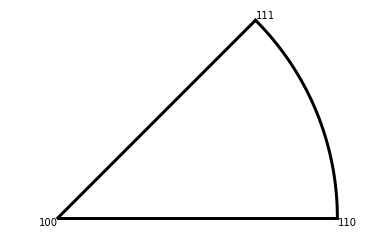

In [6]:
IPF_axis_cubic(100);

#### Rotation matrices for fcc structures to capture all 24 symmetry operations

In [7]:
r1=np.matrix([[1,0,0],[0,1,0],[0,0,1]])
r2=np.matrix([[0,0,1],[1,0,0],[0,1,0]])
r3=np.matrix([[0,1,0],[0,0,1],[1,0,0]])
r4=np.matrix([[0,-1,0],[0,0,1],[-1,0,0]])
r5=np.matrix([[0,-1,0],[0,0,-1],[1,0,0]])
r6=np.matrix([[0,1,0],[0,0,-1],[-1,0,0]])
r7=np.matrix([[0,0,-1],[1,0,0],[0,-1,0]])
r8=np.matrix([[0,0,-1],[-1,0,0],[0,1,0]])
r9=np.matrix([[0,0,1],[-1,0,0],[0,-1,0]])
r10=np.matrix([[-1,0,0],[0,1,0],[0,0,-1]])
r11=np.matrix([[-1,0,0],[0,-1,0],[0,0,1]])
r12=np.matrix([[1,0,0],[0,-1,0],[0,0,-1]])
r13=np.matrix([[0,0,-1],[0,-1,0],[-1,0,0]])
r14=np.matrix([[0,0,1],[0,-1,0],[1,0,0]])
r15=np.matrix([[0,0,1],[0,1,0],[-1,0,0]])
r16=np.matrix([[0,0,-1],[0,1,0],[1,0,0]])
r17=np.matrix([[-1,0,0],[0,0,-1],[0,-1,0]])
r18=np.matrix([[1,0,0],[0,0,-1],[0,1,0]])
r19=np.matrix([[1,0,0],[0,0,1],[0,-1,0]])
r20=np.matrix([[-1,0,0],[0,0,1],[0,1,0]])
r21=np.matrix([[0,-1,0],[-1,0,0],[0,0,-1]])
r22=np.matrix([[0,1,0],[-1,0,0],[0,0,1]])
r23=np.matrix([[0,1,0],[1,0,0],[0,0,-1]])
r24=np.matrix([[0,-1,0],[1,0,0],[0,0,1]])

In [8]:
rotations=[eval("r" + str(i+1)) for i in np.arange(24)] #an array containing all symmetry operations

The first column gives the crystal direction along x, the second along y and the last along z. For a loading direction along X, the vector is given by column 1. So we have X along x, Y along y and Z along z:

For our IPF (see below) plot we need $\alpha$ and $\beta$.

For IPF X:

$\alpha= atan(\frac{X_2}{X_1})=atan(\frac{-cos\phi_1 sin\phi_2 -sin\phi_1 cos\phi_2 cos\Phi}{cos\phi_1 cos\phi_2 - sin\phi_1 sin\phi_2cos\Phi})$

$\beta=atan(\frac{X_3}{X_2})=atan(\frac{sin\phi_1 sin\Phi}{-cos\phi_1 sin\phi_2 -sin\phi_1 cos\phi_2 cos\Phi})$

For IPF Z:

$\alpha = atan(\frac{X_1}{X_3})=atan(\frac{sin\phi_1 sin\Phi}{cos\Phi})$

$\beta = atan(\frac{X_2}{X_1}) =atan(\frac{-cos\phi_1 sin\Phi}{sin\phi_1 sin\Phi})$

In [9]:
def plot_pole_GX(angles,rotations):
    
    '''Plots point on X inverse pole figure from euler angles given by the array [phi1,Phi,phi2]'''
    #calculate rotation matrix
    
    clist=[]
    for rot in rotations:
        a=G_matrix(angles);
        a=rot*a
        #get direction cosines for sample X axis: X=[x1,x2,x3]
        x1=(a[0,0])+1e-6; 
        x2=(a[1,0])+1e-6;
        x3=(a[2,0])+1e-6;

        #plot point
        alpha_1=np.arctan(x2/x1)
        beta_1=np.arctan(x3/x2)
        

        if (alpha_1*180/np.pi)<=45 and (alpha_1*180/np.pi)>=0 and (beta_1*180/np.pi)<=45 and (beta_1*180/np.pi)>=0:
            #print (alpha_1*180/np.pi),(beta_1*180/np.pi)
            #xi,yi=IPF_axis_cubic(100)
            px,py=np.tan(alpha_1)*np.cos(beta_1),np.tan(alpha_1)*np.sin(beta_1)+1
            #plt.plot(px,py,'r+')
            #plt.title('IPF X')
            #label='['+ str(angles[0]) +', ' + str(angles[1]) + ', '+str(angles[2]) + ']'
            #plt.text(px+0.01,py,label)
            clist.append([px,py])
            break
        
    return clist

In [10]:
def plot_pole_GY(angles,rot):
    '''Plots point on X inverse pole figure from euler angles given by the array [phi1,Phi,phi2]'''
    #calculate rotation matrix
    a=G_matrix(angles);
    
    a=rot*a
    #get direction cosines for sample X axis: X=[x1,x2,x3]
    x1=(a[0,1])+1e-6; 
    x2=(a[1,1])+1e-6;
    x3=(a[2,1])+1e-6;
    
    #plot point
    
    alpha_1=np.arctan(x1/x2)
    beta_1=np.arctan(x3/x1)
    if (alpha_1*180/np.pi)<=45 and (alpha_1*180/np.pi)>=0 and (beta_1*180/np.pi)<=45 and (beta_1*180/np.pi)>=0:
        xi,yi=IPF_axis_cubic(100)
        px,py=np.tan(alpha_1)*np.cos(beta_1),np.tan(alpha_1)*np.sin(beta_1)+1
        plt.plot(px,py,'r+')
        label='['+ str(angles[0]) +', ' + str(angles[1]) + ', '+str(angles[2]) + ']'
        plt.text(px+0.01,py,label)

In [11]:
def plot_pole_GZ(angles,rotations):
    
    '''Plots point on X inverse pole figure from euler angles given by the array [phi1,Phi,phi2]'''
    #calculate rotation matrix
    
    clist=[]
    for rot in rotations:
        a=G_matrix(angles);
        a=rot*a
        #get direction cosines for sample X axis: X=[x1,x2,x3]
        x1=(a[0,2])+1e-6; 
        x2=(a[1,2])+1e-6;
        x3=(a[2,2])+1e-6;

        #plot point
        alpha_1=np.arctan(x1/x3)
        beta_1=np.arctan(x2/x1)
        

        if (alpha_1*180/np.pi)<=45 and (alpha_1*180/np.pi)>=0 and (beta_1*180/np.pi)<=45 and (beta_1*180/np.pi)>=0:
            #print (alpha_1*180/np.pi),(beta_1*180/np.pi)
            #xi,yi=IPF_axis_cubic(100)
            px,py=np.tan(alpha_1)*np.cos(beta_1),np.tan(alpha_1)*np.sin(beta_1)+1
            #plt.plot(px,py,'r+')
            #plt.title('IPF X')
            #label='['+ str(angles[0]) +', ' + str(angles[1]) + ', '+str(angles[2]) + ']'
            #plt.text(px+0.01,py,label)
            clist.append([px,py])
            break
        
    return clist

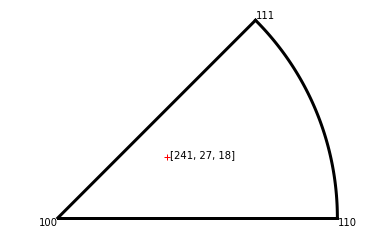

In [12]:
angles=[241,27,18]
xi,yi=IPF_axis_cubic(100)
px,py=plot_pole_GX(angles,rotations)[0][0],plot_pole_GX(angles,rotations)[0][1]
plt.plot(px,py,'r+')
label='['+ str(angles[0]) +', ' + str(angles[1]) + ', '+str(angles[2]) + ']'
plt.text(px+0.01,py,label)

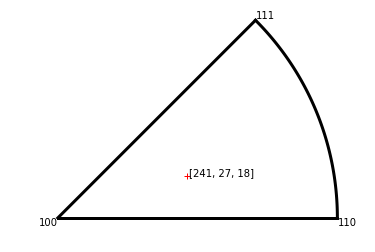

In [13]:
angles=[241,27,18]
xi,yi=IPF_axis_cubic(100)
px,py=plot_pole_GZ(angles,rotations)[0][0],plot_pole_GZ(angles,rotations)[0][1]
plt.plot(px,py,'r+')
label='['+ str(angles[0]) +', ' + str(angles[1]) + ', '+str(angles[2]) + ']'
plt.text(px+0.01,py,label)

#### Importing the euler angles from a EBSD file

In [245]:
Fat_5_FF=Read_EBSD.ReadEBSD()

In [246]:
Fat_5_FF.c5read('../DataAnalysisUtilities-master5/myData/ebsd/Project1.ctf')

Reading file...
XCells = 1103
YCells = 962
Done!


1103 962
(904, 1024, 3)
925696
(925696, 3)


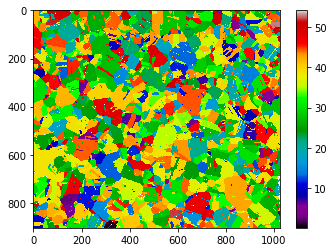

In [247]:
Fat_5_FF.create_map(21,-37,0,-79,1,0,1)#(ycropbeg,ycropend,xcropbeg,xcropend,resolution,rotation,eulerangle)

#### Get the euler angles for the cropped region

In [248]:
euler_angles=Fat_5_FF.map

In [249]:
print (np.shape(euler_angles))

(3, 904, 1024)


#### Plotting the three euler angles

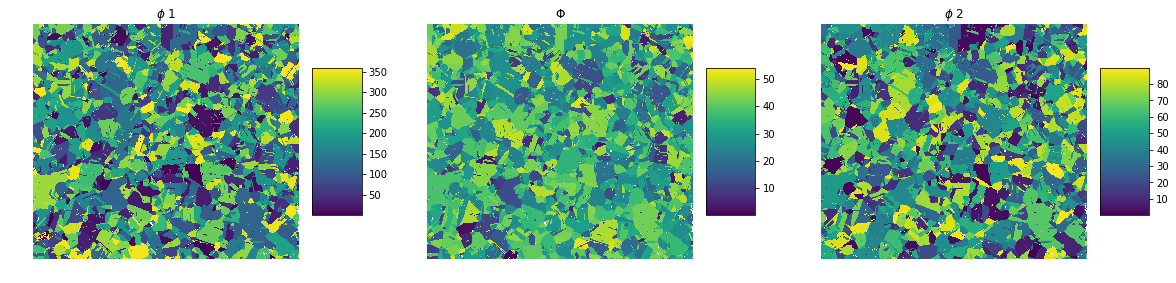

In [250]:
#f,images=plt.subplots(1,3)
plt.figure(figsize=[20,20])
for n,t in zip(np.arange(3),['$\phi\ 1$','$\Phi$','$\phi\ 2$']):
    plt.subplot(1,3,n+1)
    #ax=plt.gca()
    #print ax
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="10000%", pad=0.005)
    plt.colorbar(plt.imshow(euler_angles[n]),shrink=0.3,aspect=3, pad=0.04)
    plt.title(str(t))
    plt.axis('off')

#### Plotting IPF X

In [251]:
def plot_IPFX(euler_angles):
    phi1_list,P_list,p2_list=euler_angles[0].flatten(),euler_angles[1].flatten(),euler_angles[2].flatten()
    
    cx_list,cy_list=[],[]
    for p1,P,p2 in zip(phi1_list,P_list,p2_list):
        angles=[p1,P,p2]
        if sum(angles)>0:
            cx_list.append(plot_pole_GX(angles,rotations)[0][0]),cy_list.append(plot_pole_GX(angles,rotations)[0][1])
    return cx_list,cy_list

In [252]:
def plot_IPFZ(euler_angles):
    phi1_list,P_list,p2_list=euler_angles[0].flatten(),euler_angles[1].flatten(),euler_angles[2].flatten()
    
    cx_list,cy_list=[],[]
    for p1,P,p2 in zip(phi1_list,P_list,p2_list):
        angles=[p1,P,p2]
        if sum(angles)>0:
            cx_list.append(plot_pole_GZ(angles,rotations)[0][0]),cy_list.append(plot_pole_GZ(angles,rotations)[0][1])
    return cx_list,cy_list

In [253]:
def plot_IPFY(euler_angles):
    phi1_list,P_list,p2_list=euler_angles[0].flatten(),euler_angles[1].flatten(),euler_angles[2].flatten()
    
    cx_list,cy_list=[],[]
    for p1,P,p2 in zip(phi1_list,P_list,p2_list):
        angles=[p1,P,p2]
        if sum(angles)>0:
            cx_list.append(plot_pole_GY(angles,rotations)[0][0]),cy_list.append(plot_pole_GY(angles,rotations)[0][1])
    return cx_list,cy_list

In [254]:
x_co,y_co=plot_IPFX(euler_angles); # matches well with Channel5

KeyboardInterrupt: 

In [ ]:
xi,yi=IPF_axis_cubic(100)
plt.plot(x_co,y_co,'ko',markersize=10)
plt.title('IPF X')

In [131]:
x_co,y_co=plot_IPFZ(euler_angles);  # matches well with Channel5

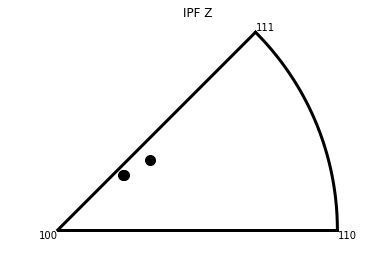

In [132]:
xi,yi=IPF_axis_cubic(100)
plt.plot(x_co,y_co,'ko',markersize=10)
plt.title('IPF Z')

In [255]:
def plot_pole_GY(angles,rotations):
    
    '''Plots point on Y inverse pole figure from euler angles given by the array [phi1,Phi,phi2]'''
    #calculate rotation matrix
    
    clist=[]
    for rot in rotations:
        a=G_matrix(angles);
        a=rot*a
        #get direction cosines for sample X axis: X=[x1,x2,x3]
        x1=(a[0,1])+1e-6; 
        x2=(a[1,1])+1e-6;
        x3=(a[2,1])+1e-6;

        #plot point
        alpha_1=np.arctan(x3/x2)
#         alpha_1=np.arctan(12/x1)
        beta_1=np.arctan(x2/x1)

        if (alpha_1*180/np.pi)<=45 and (alpha_1*180/np.pi)>=0 and (beta_1*180/np.pi)<=45 and (beta_1*180/np.pi)>=0:
            #print (alpha_1*180/np.pi),(beta_1*180/np.pi)
            #xi,yi=IPF_axis_cubic(100)
            px,py=np.tan(alpha_1)*np.cos(beta_1),np.tan(alpha_1)*np.sin(beta_1)+1
            #plt.plot(px,py,'r+')
            #plt.title('IPF X')
            #label='['+ str(angles[0]) +', ' + str(angles[1]) + ', '+str(angles[2]) + ']'
            #plt.text(px+0.01,py,label)
            clist.append([px,py])
            break
        
    return clist

In [256]:
x_co,y_co=plot_IPFY(euler_angles);

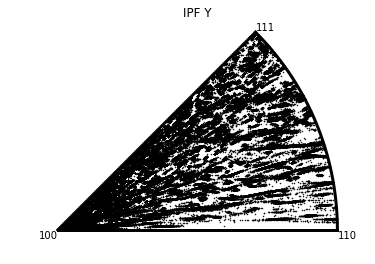

In [258]:
xi,yi=IPF_axis_cubic(100)
plt.plot(x_co,y_co,'k.',markersize=1)
plt.title('IPF Y')

In [54]:
random_strain_values=np.random.rand(len(x_co))

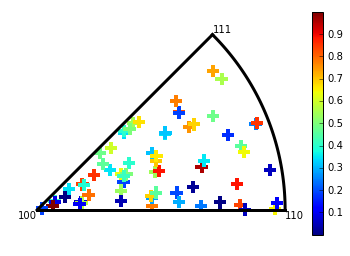

In [57]:
xi,yi=IPF_axis_cubic(100)
strain_points=plt.scatter(x_co, y_co, marker='+', s=150, linewidths=4, c=random_strain_values)
plt.colorbar(strain_points)